In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
mouse_clinical_df = pd.merge(mouse_drug_df, clinical_df, on='Mouse ID', how="inner")

# Display the data table for preview

mouse_clinical_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_drug_time = mouse_clinical_df.groupby(['Drug','Timepoint']).mean()

# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame({"Mean Tumor Volume (mm3)" : grouped_drug_time["Tumor Volume (mm3)"]})

# Preview DataFrame
mean_tumor_volume_df.head()

Mean Tumor Volume (mm3)
Drug      Timepoint                         
Capomulin 0                        45.000000
          5                        44.266086
          10                       43.084291
          15                       42.064317
          20                       40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#Group by drug to get count of data per timepoint
mouse_drug = mouse_clinical_df.groupby("Drug")
#Count data points per timepoint
tp_counts = mouse_drug["Timepoint"].value_counts()
#Put results i data frame and change column header to count
tp_counts = pd.DataFrame(tp_counts)
tp_counts = tp_counts.rename(columns={"Timepoint" : "Count"})
# Store the Tumor Volume standared deviation Grouped by Drug and Timepoint 
grouped_drug_std = mouse_clinical_df.groupby(['Drug','Timepoint']).std()
# Convert to DataFrame
mean_tumor_volume_std_df = pd.DataFrame({"STD" : grouped_drug_std["Tumor Volume (mm3)"]})
# Convert to DataFrame
mean_tumor_volume_df["SE"] = mean_tumor_volume_std_df["STD"]/np.sqrt(tp_counts["Count"])
# Preview DataFrame
mean_tumor_volume_df.head()

Mean Tumor Volume (mm3)        SE
Drug      Timepoint                                   
Capomulin 0                        45.000000  0.000000
          5                        44.266086  0.448593
          10                       43.084291  0.702684
          15                       42.064317  0.838617
          20                       40.716325  0.909731

In [4]:
tv_df = pd.DataFrame(mean_tumor_volume_df.reset_index())
# Minor Data Munging to Re-Format the Data Frames
tv_df = tv_df.pivot(index='Timepoint', columns='Drug')
# Preview that Reformatting worked
tv_df.head()

Mean Tumor Volume (mm3)                                              \
Drug                    Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                       
0                       45.000000  45.000000  45.000000  45.000000  45.000000   
5                       44.266086  46.503051  47.062001  47.389175  46.796098   
10                      43.084291  48.285125  49.403909  49.582269  48.694210   
15                      42.064317  50.094055  51.296397  52.399974  50.933018   
20                      40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                        SE  \
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol Capomulin   
Timepoint                                                                    
0          45.000000  45.000000  45.000000  45.000000  45.000000  0.000000   
5          47.125589  47.248967  43.944859  47.527452  46.851818  0.448593   
10         49.423329  49.101541  42.531957  49.463844  48.689881  0.702684   
15         51.359742  51.067318  41.495061  51.529409  50.779059  0.838617   
20         54.364417  53.346737  40.238325  54.067395  53.170334  0.909731   

                                                                       \
Drug       Ceftamin Infubinol  Ketapril  Naftisol   Placebo  Propriva   
Timepoint                                                               
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5          0.164505  0.235102  0.264819  0.202385  0.218091  0.231708   
10         0.236144  0.282346  0.357421  0.319415  0.402064  0.376195   
15         0.332053  0.357705  0.580268  0.444378  0.614461  0.466109   
20         0.359482  0.476210  0.726484  0.595260  0.839609  0.555181   

                                         
Drug       Ramicane  Stelasyn Zoniferol  
Timepoint                                
0          0.000000  0.000000  0.000000  
5          0.482955  0.239862  0.188950  
10         0.720225  0.433678  0.263949  
15         0.770432  0.493261  0.370544  
20         0.786199  0.621889  0.533182

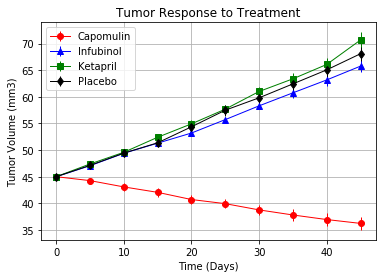

In [5]:
# Show the Figure
capomulin = plt.errorbar(tv_df.index, tv_df["Mean Tumor Volume (mm3)"]["Capomulin"], 
             yerr=tv_df["SE"]["Capomulin"], 
             elinewidth=1, 
             color="red", 
             marker="o",
             linewidth=1)
infubinol = plt.errorbar(tv_df.index, tv_df["Mean Tumor Volume (mm3)"]["Infubinol"], 
             yerr=tv_df["SE"]["Infubinol"], 
             elinewidth=1, 
             color="blue", 
             marker="^",
             linewidth=1)
ketapril = plt.errorbar(tv_df.index, tv_df["Mean Tumor Volume (mm3)"]["Ketapril"], 
             yerr=tv_df["SE"]["Ketapril"], 
             elinewidth=1, 
             color="green", 
             marker="s",
             linewidth=1)
placebo = plt.errorbar(tv_df.index, tv_df["Mean Tumor Volume (mm3)"]["Placebo"], 
             yerr=tv_df["SE"]["Placebo"], 
             elinewidth=1, 
             color="black",
             marker="d", 
             linewidth=1)
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid()
plt.legend(loc="best")
plt.savefig("tumor-response.png")
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
mean_metsite_df = pd.DataFrame({"Metastatic Sites" : grouped_drug_time["Metastatic Sites"]})

# Preview DataFrame
mean_metsite_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metsites_std_df = pd.DataFrame({"STD" : grouped_drug_std["Metastatic Sites"]})
# Convert to DataFrame
mean_metsite_df["SE"] = metsites_std_df["STD"]/np.sqrt(tp_counts["Count"])
# Preview DataFrame
mean_metsite_df.head()

Metastatic Sites        SE
Drug      Timepoint                            
Capomulin 0                  0.000000  0.000000
          5                  0.160000  0.074833
          10                 0.320000  0.125433
          15                 0.375000  0.132048
          20                 0.652174  0.161621

In [8]:
ms_df = pd.DataFrame(mean_metsite_df.reset_index())
# Minor Data Munging to Re-Format the Data Frames
ms_df = ms_df.pivot(index='Timepoint', columns='Drug')
# Preview that Reformatting worked
ms_df.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                         SE            \
Drug       Propriva  Ramicane  Stelasyn Zoniferol Capomulin  Ceftamin   
Timepoint                                                               
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5          0.320000  0.120000  0.240000  0.166667  0.074833  0.108588   
10         0.565217  0.250000  0.478261  0.500000  0.125433  0.152177   
15         0.764706  0.333333  0.782609  0.809524  0.132048  0.180625   
20         1.000000  0.347826  0.952381  1.294118  0.161621  0.241034   

                                                                       \
Drug      Infubinol  Ketapril  Naftisol   Placebo  Propriva  Ramicane   
Timepoint                                                               
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5          0.091652  0.098100  0.093618  0.100947  0.095219  0.066332   
10         0.159364  0.142018  0.163577  0.115261  0.105690  0.090289   
15         0.194015  0.191381  0.158651  0.190221  0.136377  0.115261   
20         0.234801  0.236680  0.181731  0.234064  0.171499  0.119430   

                               
Drug       Stelasyn Zoniferol  
Timepoint                      
0          0.000000  0.000000  
5          0.087178  0.077709  
10         0.123672  0.109109  
15         0.153439  0.111677  
20         0.200905  0.166378

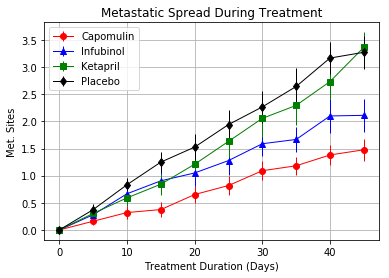

In [9]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure
capomulin = plt.errorbar(ms_df.index, ms_df["Metastatic Sites"]["Capomulin"], 
             yerr=ms_df["SE"]["Capomulin"], 
             elinewidth=1, 
             color="red", 
             marker="o",
             linewidth=1)
infubinol = plt.errorbar(ms_df.index, ms_df["Metastatic Sites"]["Infubinol"], 
             yerr=ms_df["SE"]["Infubinol"], 
             elinewidth=1, 
             color="blue", 
             marker="^",
             linewidth=1)
ketapril = plt.errorbar(ms_df.index, ms_df["Metastatic Sites"]["Ketapril"], 
             yerr=ms_df["SE"]["Ketapril"], 
             elinewidth=1, 
             color="green", 
             marker="s",
             linewidth=1)
placebo = plt.errorbar(ms_df.index, ms_df["Metastatic Sites"]["Placebo"], 
             yerr=ms_df["SE"]["Placebo"], 
             elinewidth=1, 
             color="black",
             marker="d", 
             linewidth=1)
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid()
plt.legend(loc="best")
plt.savefig("metastases.png")
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
mouse_counts = tp_counts
mouse_counts.head()

Count
Drug      Timepoint       
Capomulin 0             25
          5             25
          10            25
          15            24
          20            23

In [11]:
mouse_counts = pd.DataFrame(mouse_counts.reset_index())
# Minor Data Munging to Re-Format the Data Frames
mouse_counts = mouse_counts.pivot(index='Timepoint', columns='Drug')
# Preview the Data Frame
mouse_counts.head()

Count                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

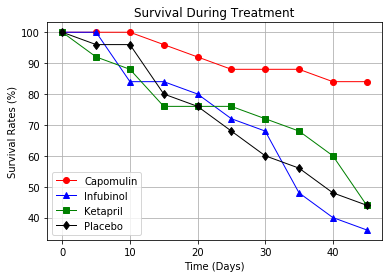

In [12]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure
capomulin = plt.plot((mouse_counts["Count"]["Capomulin"]/25)*100,  
             color="red", 
             marker="o",
             linewidth=1)
infubinol = plt.plot((mouse_counts["Count"]["Infubinol"]/25)*100,  
             color="blue", 
             marker="^",
             linewidth=1)
ketapril = plt.plot((mouse_counts["Count"]["Ketapril"]/25)*100, 
             color="green", 
             marker="s",
             linewidth=1)
placebo = plt.plot((mouse_counts["Count"]["Placebo"]/25)*100, 
             color="black",
             marker="d", 
             linewidth=1)
plt.title("Survival During Treatment")
plt.ylabel("Survival Rates (%)")
plt.xlabel("Time (Days)")
plt.grid()
plt.legend(loc="best")
plt.savefig("survival.png")
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
#Get clean list of drugs
drugs = pd.DataFrame(mouse_clinical_df["Drug"])
drugs = pd.DataFrame(drugs.drop_duplicates(keep='first'))
druglist = drugs["Drug"].tolist()
#Get data frame with just mean tumor volumes
new_mtv_df = pd.DataFrame(mean_tumor_volume_df["Mean Tumor Volume (mm3)"])
#Set variable to contain lists of baseline and terminal tumor volumes
timeZero = []
time45 = []
#Get baseline and terminal tumor volumes
for drug in druglist:
    timeZero.append(new_mtv_df.loc[(drug, 0)][0])
    time45.append(new_mtv_df.loc[(drug, 45)][0])
#Create data frame with results
tv_change_df = pd.DataFrame({"Drug" : druglist,
                           "time_zero" : timeZero,
                           "time_45" : time45})
#Create column with calculated percent change
tv_change_df["percent_change"] = (tv_change_df["time_45"] - tv_change_df["time_zero"])/(tv_change_df["time_zero"]) * 100
# Display the data to confirm
tv_change_df

,Drug,time_zero,time_45,percent_change
0,Stelasyn,45.0,68.438310,52.085134
1,Propriva,45.0,66.258529,47.241175
2,Naftisol,45.0,69.265506,53.923347
3,Ketapril,45.0,70.662958,57.028795
4,Capomulin,45.0,36.236114,-19.475303
5,Infubinol,45.0,65.755562,46.123472
6,Ceftamin,45.0,64.132421,42.516492
7,Zoniferol,45.0,65.960888,46.579751
8,Ramicane,45.0,34.955595,-22.320900
9,Placebo,45.0,68.084082,51.297960


In [14]:
# Store all Relevant Percent Changes into a Tuple
tuplePercent = tuple(tv_change_df["percent_change"].tolist())

In [15]:
Capomulin = pd.DataFrame(tv_change_df.loc[tv_change_df["Drug"] == "Capomulin"])
Infubinol = pd.DataFrame(tv_change_df.loc[tv_change_df["Drug"] == "Infubinol"])
Ketapril = pd.DataFrame(tv_change_df.loc[tv_change_df["Drug"] == "Ketapril"])
Placebo = pd.DataFrame(tv_change_df.loc[tv_change_df["Drug"] == "Placebo"])

In [16]:
barchart_df = Capomulin.append(Infubinol)
barchart_df = barchart_df.append(Ketapril)
barchart_df = barchart_df.append(Placebo)

barchart_df = barchart_df.set_index("Drug")
barchart_df = pd.DataFrame(barchart_df["percent_change"])

In [17]:
# Splice the data between passing and failing drugs
colorbars = []
for index, row in barchart_df.iterrows():
    if row["percent_change"] > 0:
        colorbars.append("red")
    else:
        colorbars.append("green")

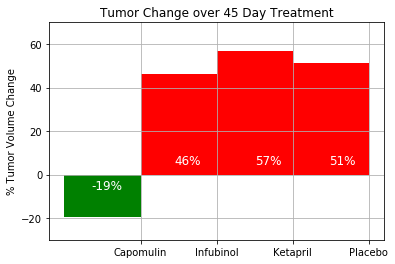

In [18]:
# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()
ax.bar(barchart_df.index, barchart_df["percent_change"],
        color = colorbars,
        align = 'edge',
        width = -1)
ax.grid(True, which = 'major')
ax.set_ylim(-30, 70)
ax.set_ylabel('% Tumor Volume Change')
ax.set_title("Tumor Change over 45 Day Treatment")

# Use functions to label the percentages of changes
def percentlabel():
    format_label = []
    plabel = [row["percent_change"] for index, row in barchart_df.iterrows()]
    for p in plabel:
        p = '{:.0f}%'.format(p)
        format_label.append(p)
    ax.text(0.125, .235, format_label[0], transform=ax.transAxes, color="white", fontsize=12)
    ax.text(0.375, .35, format_label[1], transform=ax.transAxes, color="white", fontsize=12)
    ax.text(0.615, .35, format_label[2], transform=ax.transAxes, color="white", fontsize=12)
    ax.text(0.835, .35, format_label[3], transform=ax.transAxes, color="white", fontsize=12)
# Call functions to implement the function calls
percentlabel()

# Save the Figure
fig.savefig('Tumor_Change_bar.png')

# Show the Figure
fig.show()